In [202]:
import numpy as np

from glob import glob

In [203]:

import pandas as pd

import os


In [204]:

import cv2


In [205]:
images_path = 'FlickrData/ImageData/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [206]:
images[:5]

['FlickrData/ImageData\\1000268201_693b08cb0e.jpg',
 'FlickrData/ImageData\\1001773457_577c3a7d70.jpg',
 'FlickrData/ImageData\\1002674143_1b742ab4b8.jpg',
 'FlickrData/ImageData\\1003163366_44323f5815.jpg',
 'FlickrData/ImageData\\1007129816_e794419615.jpg']

In [207]:
import matplotlib.pyplot as plt

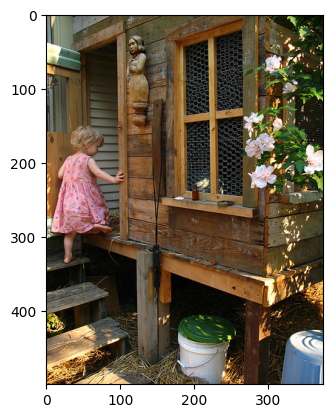

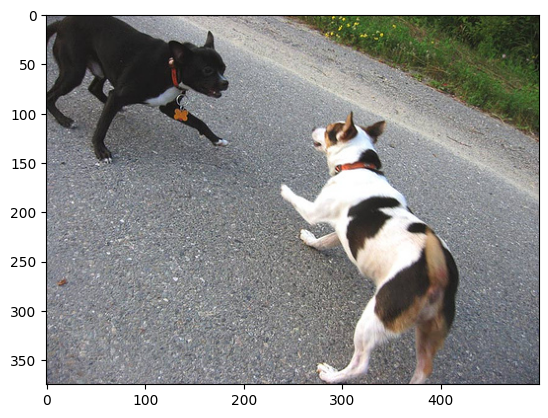

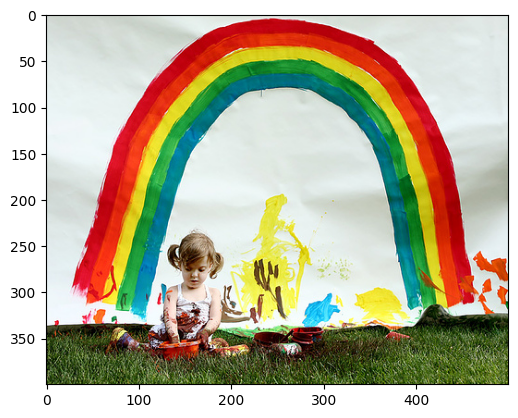

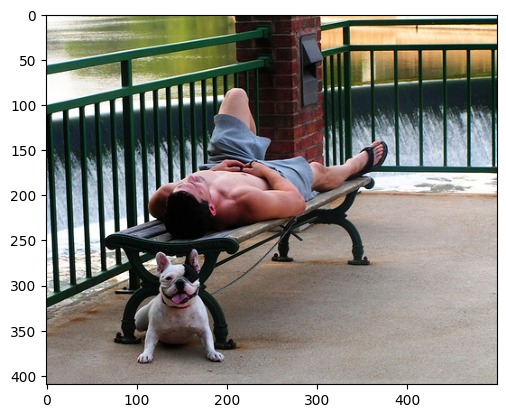

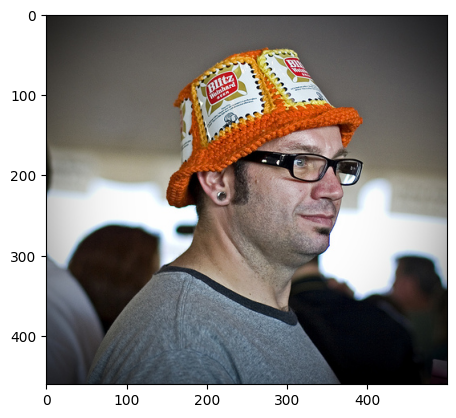

In [208]:
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [209]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [210]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [211]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('\\')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 199:
        break
        
    elif count % 50 == 0:
        print(count)


1/1 [==============================] - 0s 125ms/step
50
1/1 [==============================] - 0s 141ms/step
100
1/1 [==============================] - 0s 125ms/step
150
1/1 [==============================] - 0s 141ms/step


In [212]:
images_features

{'1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.09850312,
        0.16856465], dtype=float32),
 '1012212

In [213]:
len(images_features)

200

In [214]:
images_features


{'1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.09850312,
        0.16856465], dtype=float32),
 '1012212

In [215]:
caption_path = './FlickrData/Flickr8k_text/Flickr8k.token.txt'

In [216]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [217]:
captions


['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [218]:
len(captions)

40461

In [219]:
images_features

{'1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.09850312,
        0.16856465], dtype=float32),
 '1012212

In [220]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [221]:
len(captions_dict)

200

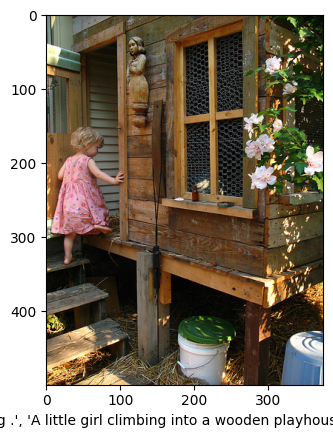

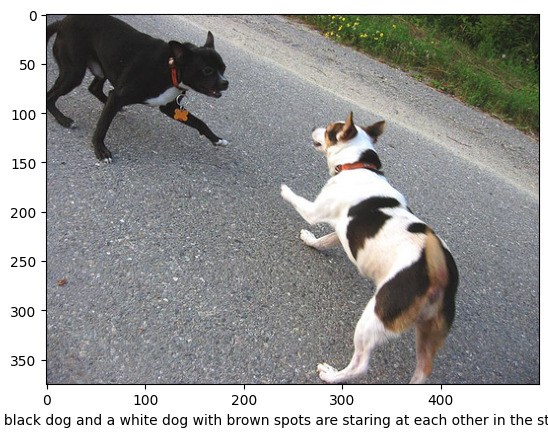

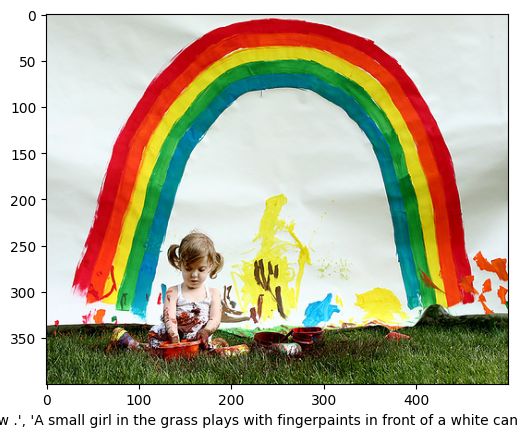

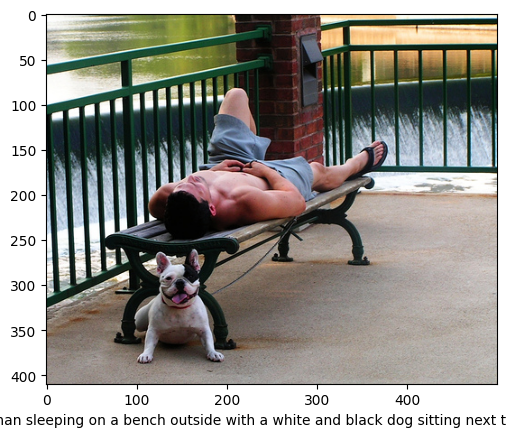

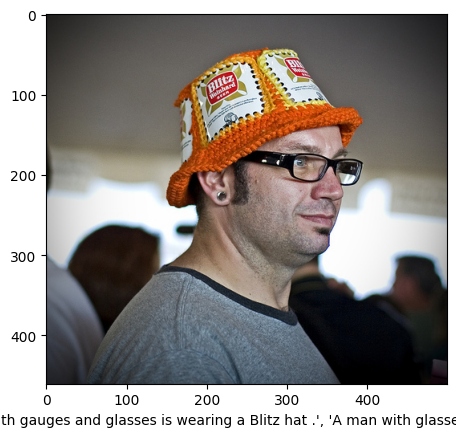

In [222]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('\\')[-1]])
    plt.imshow(img)

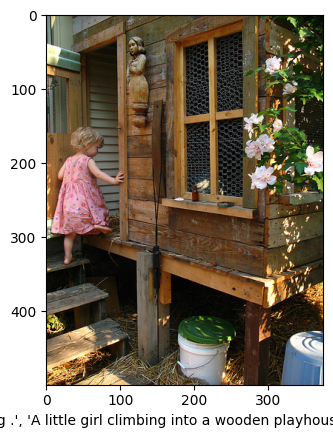

In [223]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'FlickrData/ImageData/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break
    

In [224]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [225]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [226]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [227]:
len(count_words)

1245

In [228]:
captions_dict


{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq',
  'startofseq a girl going into a wooden building . endofseq',
  'startofseq a little girl climbing into a wooden playhouse . endofseq',
  'startofseq a little girl climbing the stairs to her playhouse . endofseq',
  'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'],
 '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq',
  'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq',
  'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq',
  'startofseq two dogs of different breeds looking at each other on the road . endofseq',
  'startofseq two dogs on pavement moving toward each other . endofseq'],
 '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rai

In [229]:

for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            encoded.append(count_words[word])


        captions_dict[k][vv.index(v)] = encoded

In [230]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[999,
   1637,
   57,
   458,
   1637,
   8,
   9,
   245,
   29,
   37,
   1637,
   3,
   173,
   1,
   458,
   64,
   0,
   3,
   906,
   999],
  [999, 1637, 100, 3, 48, 1637, 7, 12, 906, 999],
  [999, 1637, 56, 100, 29, 48, 1637, 7, 1, 906, 999],
  [999, 1637, 56, 100, 29, 452, 1, 82, 25, 1, 906, 999],
  [999, 1637, 56, 100, 458, 1637, 8, 9, 3, 48, 1637, 7, 0, 906, 999]],
 '1001773457_577c3a7d70.jpg': [[999,
   1637,
   91,
   220,
   225,
   1637,
   0,
   220,
   83,
   0,
   999],
  [999,
   1637,
   91,
   220,
   225,
   1637,
   0,
   220,
   58,
   187,
   12,
   21,
   300,
   452,
   10,
   906,
   999],
  [999,
   1637,
   91,
   220,
   225,
   1637,
   86,
   220,
   187,
   89,
   0,
   83,
   1,
   102,
   12,
   21,
   458,
   452,
   30,
   906,
   999],
  [999, 123, 56, 173, 3, 1, 14, 102, 12, 21, 300, 452, 10, 906, 999],
  [999, 123, 56, 300, 1, 1, 1, 12, 21, 906, 999]],
 '1002674143_1b742ab4b8.jpg': [[999,
   1637,
   56,
   100,
   

In [231]:
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [232]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[999, 1637, 57, 458, 1637, 8, 9, 245, 29, 37, 1637, 3, 173, 1, 458, 64, 0, 3, 906, 999]
[999, 1637, 91, 220, 225, 1637, 86, 220, 187, 89, 0, 83, 1, 102, 12, 21, 458, 452, 30, 906, 999]
[999, 1637, 56, 100, 14, 458, 0, 27, 458, 52, 173, 1637, 3, 3, 187, 25, 4, 458, 1637, 0, 906, 999]
[999, 1637, 42, 100, 458, 452, 40, 19, 187, 0, 458, 52, 173, 1637, 86, 1, 187, 1637, 3, 300, 15, 906, 999]
[999, 1637, 6, 225, 64, 1, 69, 8, 0, 34, 452, 1, 69, 52, 26, 82, 1637, 1, 187, 1637, 33, 34, 2, 906, 999]
[999, 1637, 183, 245, 27, 452, 9, 173, 1637, 86, 37, 82, 54, 23, 458, 52, 173, 7, 1, 54, 23, 183, 11, 300, 906, 999]
[999, 1637, 183, 458, 78, 4, 1637, 56, 121, 37, 458, 452, 27, 225, 5, 17, 12, 82, 0, 42, 0, 3, 1, 24, 12, 906, 999]
[999, 452, 100, 458, 452, 0, 5, 1, 245, 37, 26, 82, 123, 85, 71, 1, 25, 245, 57, 1637, 91, 2, 225, 452, 21, 245, 2, 0, 906, 999]
[999, 10, 83, 48, 85, 71, 69, 25, 3, 1, 27, 1637, 0, 2, 69, 25, 187, 11, 0, 3, 225, 1, 458, 25, 23, 69, 225, 25, 187, 0, 2, 906, 999]


In [233]:
MAX_LEN

33

In [234]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[999,
   1637,
   57,
   458,
   1637,
   8,
   9,
   245,
   29,
   37,
   1637,
   3,
   173,
   1,
   458,
   64,
   0,
   3,
   906,
   999],
  [999, 1637, 100, 3, 48, 1637, 7, 12, 906, 999],
  [999, 1637, 56, 100, 29, 48, 1637, 7, 1, 906, 999],
  [999, 1637, 56, 100, 29, 452, 1, 82, 25, 1, 906, 999],
  [999, 1637, 56, 100, 458, 1637, 8, 9, 3, 48, 1637, 7, 0, 906, 999]],
 '1001773457_577c3a7d70.jpg': [[999,
   1637,
   91,
   220,
   225,
   1637,
   0,
   220,
   83,
   0,
   999],
  [999,
   1637,
   91,
   220,
   225,
   1637,
   0,
   220,
   58,
   187,
   12,
   21,
   300,
   452,
   10,
   906,
   999],
  [999,
   1637,
   91,
   220,
   225,
   1637,
   86,
   220,
   187,
   89,
   0,
   83,
   1,
   102,
   12,
   21,
   458,
   452,
   30,
   906,
   999],
  [999, 123, 56, 173, 3, 1, 14, 102, 12, 21, 300, 452, 10, 906, 999],
  [999, 123, 56, 300, 1, 1, 1, 12, 21, 906, 999]],
 '1002674143_1b742ab4b8.jpg': [[999,
   1637,
   56,
   100,
   

In [235]:
Batch_size = 5000
VOCAB_SIZE = len(count_words)

In [236]:
def generator(photo, caption):
    
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [237]:
X, y_in, y_out = generator(images_features, captions_dict)

IndexError: index 1637 is out of bounds for axis 1 with size 1245

In [ ]:
len(X), len(y_in), len(y_out)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

In [ ]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit([X, y_in], y_out, batch_size=10, epochs=5)

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
inv_dict = {v:k for k, v in count_words.items()}

In [ ]:
np.save('vocab.npy', count_words)

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
model.save('model.h5')

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
test_feature = modele.predict(getImage(29)).reshape(1,2048)


In [ ]:
test_img_path = images[29]
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [ ]:
text_inp = ['startofseq']

count = 0
caption = ''
while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
        encoded.append(count_words[i])

    encoded = [encoded]

    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


    prediction = np.argmax(model.predict([test_feature, encoded]))

    sampled_word = inv_dict[prediction]

    caption = caption + ' ' + sampled_word
            
    

    text_inp.append(sampled_word)
        
plt.figure()
plt.imshow(test_img)
plt.xlabel(caption)

In [ ]:
caption